<a href="https://colab.research.google.com/github/damar3c50/RFM_Analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/dataset-ecommerce_Farah.xlsx')
df.head()

Order ID Order Date  Ship Date  Aging    Ship Mode    Product Category  \
0  AU-2015-1 2015-11-09 2015-11-17    8.0  First Class  Auto & Accessories   
1  AU-2015-2 2015-06-30 2015-07-02    2.0  First Class  Auto & Accessories   
2  AU-2015-3 2015-12-05 2015-12-13    8.0  First Class  Auto & Accessories   
3  AU-2015-4 2015-05-09 2015-05-16    7.0  First Class  Auto & Accessories   
4  AU-2015-5 2015-07-09 2015-07-18    9.0  First Class  Auto & Accessories   

             Product Sales Quantity Discount  ...  Shipping Cost  \
0  Car Media Players   140        2     0.05  ...            4.6   
1       Car Speakers   211        3     0.03  ...           11.2   
2    Car Body Covers   117        5     0.01  ...            3.1   
3    Car & Bike Care   118        2     0.05  ...            2.6   
4               Tyre   250        1     0.04  ...             16   

  Order Priority Customer ID    Customer Name      Segment        City  \
0         Medium      LS-001     Lane Daniels     Consumer    Brisbane   
1         Medium      IZ-002    Alvarado Kriz  Home Office      Berlin   
2       Critical      EN-003       Moon Weien     Consumer     Porirua   
3           High      AN-004  Sanchez Bergman    Corporate       Kabul   
4       Critical      ON-005     Rowe Jackson    Corporate  Townsville   

        State      Country        Region Months  
0  Queensland    Australia       Oceania    Nov  
1      Berlin      Germany       Central    Jun  
2  Wellington  New Zealand       Oceania    Dec  
3       Kabul  Afghanistan  Central Asia    May  
4  Queensland    Australia       Oceania    Jul  

[5 rows x 21 columns]

#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  datetime64[ns]
 3   Aging             51302 non-null  float64       
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51302 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  float64       
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51301 non-null  object        
 13  Customer ID       51302 non-null  object        
 14  Customer Name     5130

Check Data
- kolom aging salah tipe data
- kolom aging ada yang null
- kolom sales salah tipe data
- kolom ship mode, product category dan product merupakan data category
- kolom quantity salah tipe data
- kolom discount salah tipe data
- kolom quantity ada nilai abc
- kolom discount ada nilai xxx
- kolom sales ada nilai 0.xf
- shipping cost salah tipe data
- kolom order priority ada yang null
- kolom customer id ada yang null
- kolom segment ada yang null
- kolom region ada yang null
- kolom shipping_cost ada nilai test

In [ ]:
#Merubah nama kolom agar jadi lebih mudah dalam penulisan koding
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.head()

order_id order_date  ship_date  aging    ship_mode    product_category  \
0  AU-2015-1 2015-11-09 2015-11-17    8.0  First Class  Auto & Accessories   
1  AU-2015-2 2015-06-30 2015-07-02    2.0  First Class  Auto & Accessories   
2  AU-2015-3 2015-12-05 2015-12-13    8.0  First Class  Auto & Accessories   
3  AU-2015-4 2015-05-09 2015-05-16    7.0  First Class  Auto & Accessories   
4  AU-2015-5 2015-07-09 2015-07-18    9.0  First Class  Auto & Accessories   

             product sales quantity discount  ...  shipping_cost  \
0  Car Media Players   140        2     0.05  ...            4.6   
1       Car Speakers   211        3     0.03  ...           11.2   
2    Car Body Covers   117        5     0.01  ...            3.1   
3    Car & Bike Care   118        2     0.05  ...            2.6   
4               Tyre   250        1     0.04  ...             16   

  order_priority customer_id    customer_name      segment        city  \
0         Medium      LS-001     Lane Daniels     Consumer    Brisbane   
1         Medium      IZ-002    Alvarado Kriz  Home Office      Berlin   
2       Critical      EN-003       Moon Weien     Consumer     Porirua   
3           High      AN-004  Sanchez Bergman    Corporate       Kabul   
4       Critical      ON-005     Rowe Jackson    Corporate  Townsville   

        state      country        region months  
0  Queensland    Australia       Oceania    Nov  
1      Berlin      Germany       Central    Jun  
2  Wellington  New Zealand       Oceania    Dec  
3       Kabul  Afghanistan  Central Asia    May  
4  Queensland    Australia       Oceania    Jul  

[5 rows x 21 columns]

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / len(df)) * 100

# Create a new DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing (%)': percentage_missing
})

# Print the missing data information
print(missing_data_info)

                       Column Name  Missing Values  Percentage Missing (%)
order_id                  order_id               0                0.000000
order_date              order_date               0                0.000000
ship_date                ship_date               0                0.000000
aging                        aging               1                0.001949
ship_mode                ship_mode               0                0.000000
product_category  product_category               0                0.000000
product                    product               0                0.000000
sales                        sales               0                0.000000
quantity                  quantity               1                0.001949
discount                  discount               0                0.000000
profit                      profit               0                0.000000
shipping_cost        shipping_cost               0                0.000000
order_priority      order

In [ ]:
#Mengisi nilai missing values pada kolom aging dengan hasil pengurangan order_date dan ship_date
df['aging'].fillna(6, inplace=True)

In [ ]:
#Mengganti nilai abc pada kolom quantity dengan 0
df.loc[df["quantity"] == "abc", "quantity"] = 0

In [ ]:
#Menghapus baris yang nilai discountnya == xxx
index_discount = df[(df['discount'] == 'xxx')].index
df.drop(index_discount, inplace=True)

In [ ]:
#Menghapus baris yang nilai sales == 0.fx
index_sales = df[(df['sales'] == '0.xf')].index
df.drop(index_sales, inplace=True)

In [ ]:
#Menghapus baris yang nilai shipping_cost == test
index_ship_cost = df[(df['shipping_cost'] == 'test')].index
df.drop(index_ship_cost, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51300 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51300 non-null  object        
 1   order_date        51300 non-null  datetime64[ns]
 2   ship_date         51300 non-null  datetime64[ns]
 3   aging             51300 non-null  float64       
 4   ship_mode         51300 non-null  object        
 5   product_category  51300 non-null  object        
 6   product           51300 non-null  object        
 7   sales             51300 non-null  object        
 8   quantity          51299 non-null  object        
 9   discount          51300 non-null  object        
 10  profit            51300 non-null  float64       
 11  shipping_cost     51300 non-null  object        
 12  order_priority    51298 non-null  object        
 13  customer_id       51299 non-null  object        
 14  customer_name     5130

In [ ]:
df.dropna(subset=['quantity'], inplace=True)
df.dropna(subset=['order_priority'], inplace=True)
df.dropna(subset=['customer_id'], inplace=True)
df.dropna(subset=['segment'], inplace=True)
df.dropna(subset=['region'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  float64       
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales             51294 non-null  object        
 8   quantity          51294 non-null  object        
 9   discount          51294 non-null  object        
 10  profit            51294 non-null  float64       
 11  shipping_cost     51294 non-null  object        
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [ ]:
#Merubah tipe data pada kolom tertentu
df['aging'] = df['aging'].astype(int)
df['quantity'] = df['quantity'].astype(int)
df['sales'] = df['sales'].astype(int)
df['discount'] = df['discount'].astype(float)
df['shipping_cost'] = df['shipping_cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  int64         
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales             51294 non-null  int64         
 8   quantity          51294 non-null  int64         
 9   discount          51294 non-null  float64       
 10  profit            51294 non-null  float64       
 11  shipping_cost     51294 non-null  float64       
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [ ]:
#Check duplicate rows and count
duplicated_rows = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='count')
print(duplicated_rows)

#There is 9 duplicated rows and for better modelling, it should delete.

#Drop duplicated rows
df.drop_duplicates(keep=False, inplace=True)
df.info()

        order_id order_date  ship_date  aging       ship_mode  \
0  FA-2015-30775 2016-01-02 2016-01-06      5  Standard Class   

  product_category      product  sales  quantity  discount  ...  \
0          Fashion  Sports Wear     85         3      0.03  ...   

   order_priority  customer_id    customer_name      segment      city  \
0          Medium   RZ-0040981  Mcclure Schwarz  Home Office  Valinhos   

       state country region months count  
0  São Paulo  Brazil  South    Jan     9  

[1 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51285 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51285 non-null  object        
 1   order_date        51285 non-null  datetime64[ns]
 2   ship_date         51285 non-null  datetime64[ns]
 3   aging             51285 non-null  int64         
 4   ship_mode         51285 non-null  obje

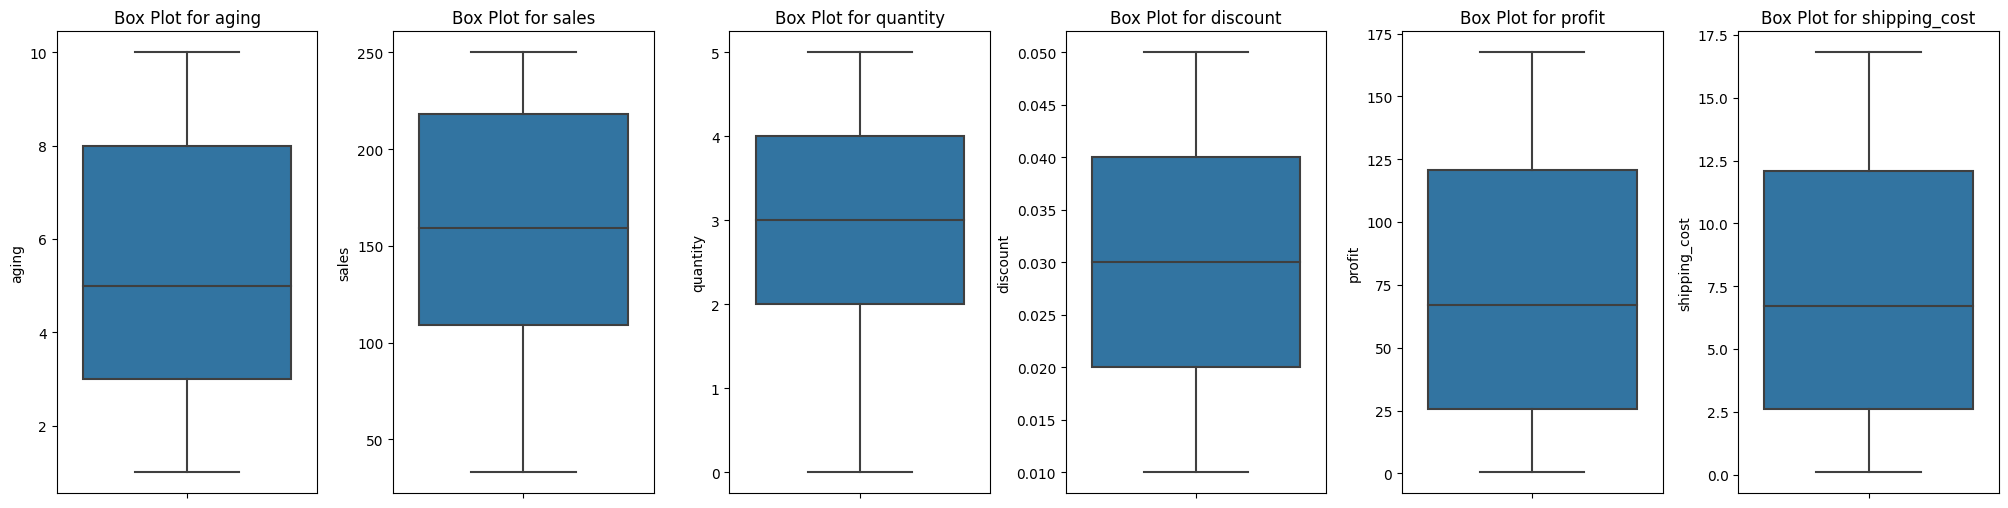

In [ ]:
#Filter column with numeric data types
numeric_col = df.select_dtypes(include=['int', 'float']).columns

#Create box plot with set to 1.5 time the IQR
fig, axs = plt.subplots(ncols=len(numeric_col), figsize = (20, 5))

for i, column in enumerate(numeric_col):
  sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)

  axs[i].set_title(f'Box Plot for {column}')
  axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

array([[<Axes: title={'center': 'order_date'}>,
        <Axes: title={'center': 'ship_date'}>,
        <Axes: title={'center': 'aging'}>],
       [<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'discount'}>],
       [<Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'shipping_cost'}>, <Axes: >]],
      dtype=object)

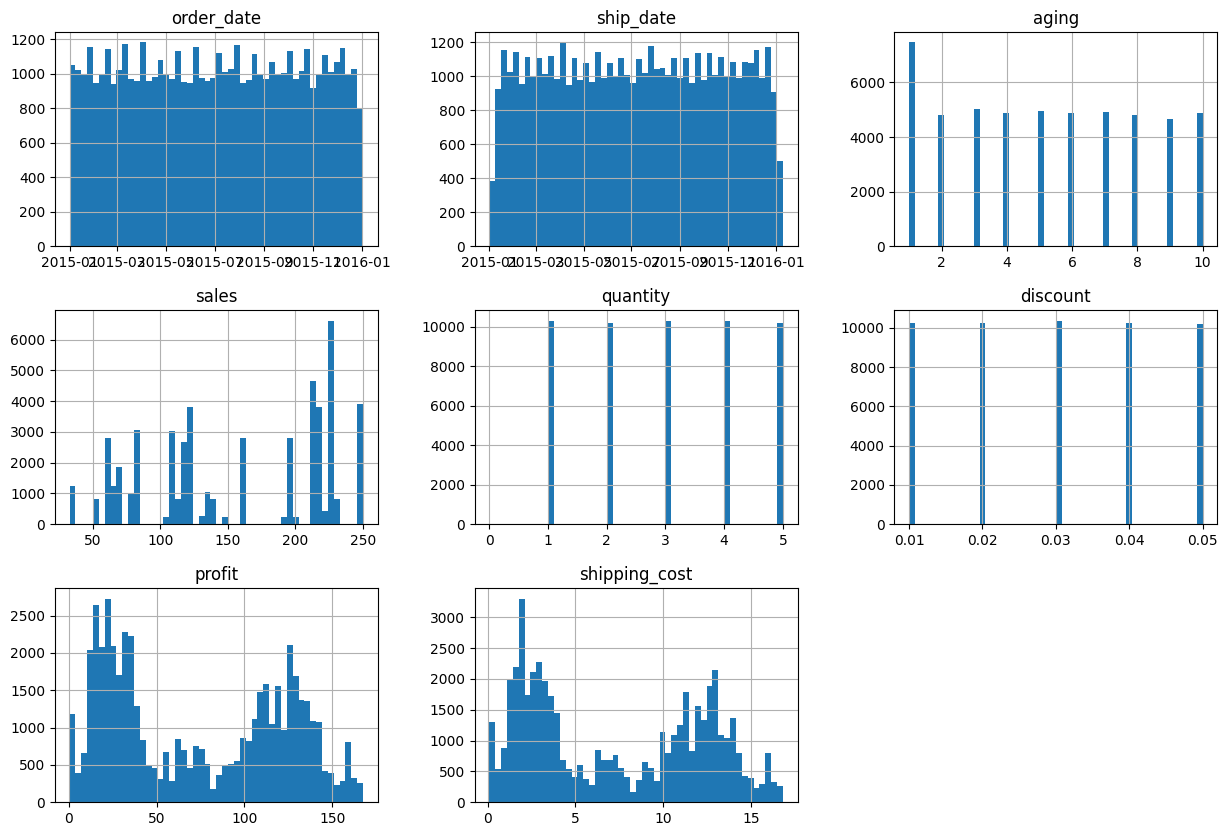

In [ ]:
df.hist(bins=50, figsize=(15,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51285 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51285 non-null  object        
 1   order_date        51285 non-null  datetime64[ns]
 2   ship_date         51285 non-null  datetime64[ns]
 3   aging             51285 non-null  int64         
 4   ship_mode         51285 non-null  object        
 5   product_category  51285 non-null  object        
 6   product           51285 non-null  object        
 7   sales             51285 non-null  int64         
 8   quantity          51285 non-null  int64         
 9   discount          51285 non-null  float64       
 10  profit            51285 non-null  float64       
 11  shipping_cost     51285 non-null  float64       
 12  order_priority    51285 non-null  object        
 13  customer_id       51285 non-null  object        
 14  customer_name     5128

In [ ]:
df.describe()

aging         sales      quantity      discount        profit  \
count  51285.000000  51285.000000  51285.000000  51285.000000  51285.000000   
mean       5.255279    156.420669      2.997251      0.029972     72.716617   
std        2.959908     65.779852      1.413418      0.014113     49.095814   
min        1.000000     33.000000      0.000000      0.010000      0.500000   
25%        3.000000    109.000000      2.000000      0.020000     25.700000   
50%        5.000000    159.000000      3.000000      0.030000     67.000000   
75%        8.000000    218.000000      4.000000      0.040000    120.600000   
max       10.000000    250.000000      5.000000      0.050000    167.500000   

       shipping_cost  
count   51285.000000  
mean        7.272226  
std         4.908379  
min         0.100000  
25%         2.600000  
50%         6.700000  
75%        12.100000  
max        16.800000

#EDA

###**Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51285 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51285 non-null  object        
 1   order_date        51285 non-null  datetime64[ns]
 2   ship_date         51285 non-null  datetime64[ns]
 3   aging             51285 non-null  int64         
 4   ship_mode         51285 non-null  object        
 5   product_category  51285 non-null  object        
 6   product           51285 non-null  object        
 7   sales             51285 non-null  int64         
 8   quantity          51285 non-null  int64         
 9   discount          51285 non-null  float64       
 10  profit            51285 non-null  float64       
 11  shipping_cost     51285 non-null  float64       
 12  order_priority    51285 non-null  object        
 13  customer_id       51285 non-null  object        
 14  customer_name     5128

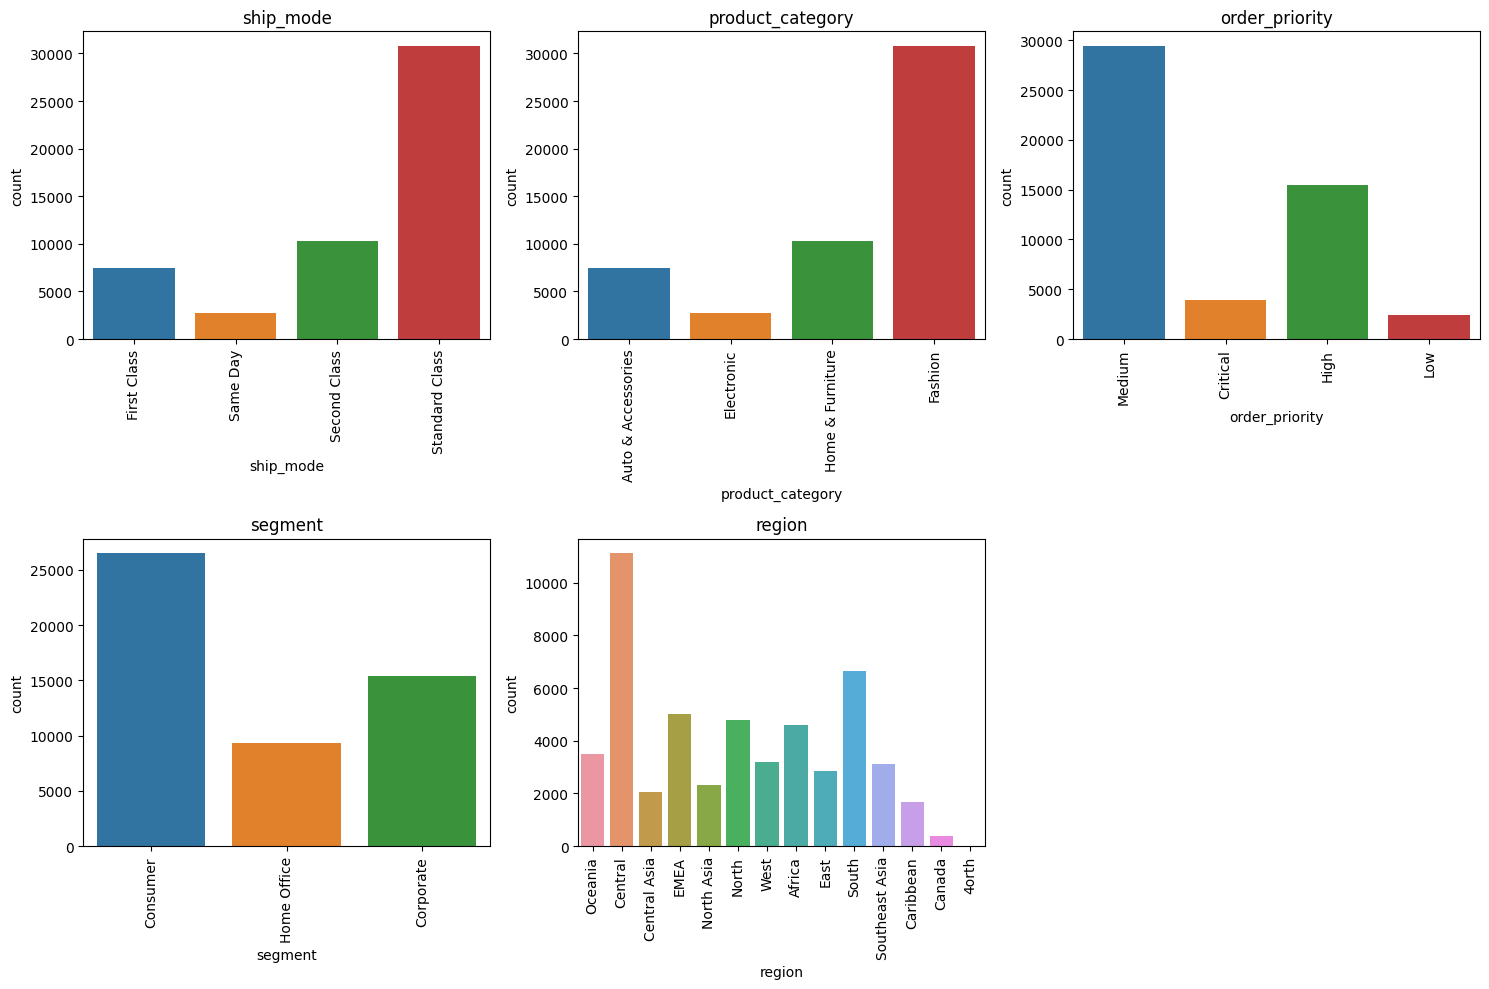

In [ ]:
#Get all column (categorical data)
vars = df[['ship_mode', 'product_category', 'order_priority', 'segment', 'region']].columns.tolist()

# Create a figure
num_cols = len(vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

#Create a countplot for top 5 of each categorical
for i, var in enumerate(vars):
  top_values = df[var].value_counts().index
  filtered_df = df[df[var].isin(top_values)]
  sns.countplot(x=var, data=filtered_df, ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

#Rmove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#Show plot
plt.show()

In [ ]:
df['ship_mode'].value_counts()

Standard Class    30779
Second Class      10309
First Class        7496
Same Day           2701
Name: ship_mode, dtype: int64

In [ ]:
df['product_category'].value_counts()

Fashion               30779
Home & Furniture      10309
Auto & Accessories     7496
Electronic             2701
Name: product_category, dtype: int64

In [ ]:
df['order_priority'].value_counts()

Medium      29435
High        15498
Critical     3928
Low          2424
Name: order_priority, dtype: int64

In [ ]:
df['segment'].value_counts()

Consumer       26511
Corporate      15428
Home Office     9346
Name: segment, dtype: int64

In [ ]:
df['region'].value_counts()

Central           11116
South              6647
EMEA               5029
North              4782
Africa             4587
Oceania            3486
West               3202
Southeast Asia     3128
East               2848
North Asia         2337
Central Asia       2048
Caribbean          1690
Canada              384
4orth                 1
Name: region, dtype: int64

###**Bivariate Analysis**

Numerical vs Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51285 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51285 non-null  object        
 1   order_date        51285 non-null  datetime64[ns]
 2   ship_date         51285 non-null  datetime64[ns]
 3   aging             51285 non-null  int64         
 4   ship_mode         51285 non-null  object        
 5   product_category  51285 non-null  object        
 6   product           51285 non-null  object        
 7   sales             51285 non-null  int64         
 8   quantity          51285 non-null  int64         
 9   discount          51285 non-null  float64       
 10  profit            51285 non-null  float64       
 11  shipping_cost     51285 non-null  float64       
 12  order_priority    51285 non-null  object        
 13  customer_id       51285 non-null  object        
 14  customer_name     5128

In [ ]:
#Define variables
import plotly.express as px
x = 'aging'
y = 'shipping_cost'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()

#Kolom aging bisa dibilang termasuk data kategori

In [ ]:
#Define variables
x = 'discount'
y = 'profit'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()
#kolom discount termasuk data kategory

In [ ]:
#Define variables
x = 'shipping_cost'
y = 'profit'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()

#Semakin besar shipping_cost semakin besar profit yang didapat

In [ ]:
#Define variables
x = 'sales'
y = 'profit'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()

#ada data yg nilai sales dan nilai profit sama

In [ ]:
#order yang mencurigakan
df[(df['sales'] == df['profit'])]

order_id order_date  ship_date  aging       ship_mode  \
6          AU-2015-7 2015-04-09 2015-04-10      1     First Class   
24        AU-2015-25 2015-02-22 2015-03-02      8     First Class   
68        AU-2015-69 2015-05-19 2015-05-21      2     First Class   
69        AU-2015-70 2015-07-23 2015-07-27      4     First Class   
123      AU-2015-124 2015-01-27 2015-02-03      7     First Class   
...              ...        ...        ...    ...             ...   
51035  FA-2015-30521 2015-05-12 2015-05-16      4  Standard Class   
51046  FA-2015-30532 2015-11-12 2015-11-16      4  Standard Class   
51057  FA-2015-30543 2015-01-04 2015-01-14     10  Standard Class   
51101  FA-2015-30587 2015-03-06 2015-03-10      4  Standard Class   
51189  FA-2015-30675 2015-07-10 2015-07-11      1  Standard Class   

         product_category     product  sales  quantity  discount  ...  \
6      Auto & Accessories     Car Mat     54         1      0.05  ...   
24     Auto & Accessories     Car Mat     54         1      0.05  ...   
68     Auto & Accessories  Bike Tyres     72         1      0.02  ...   
69     Auto & Accessories     Car Mat     54         1      0.03  ...   
123    Auto & Accessories     Car Mat     54         1      0.01  ...   
...                   ...         ...    ...       ...       ...  ...   
51035             Fashion    Sneakers     62         1      0.01  ...   
51046             Fashion    Sneakers     62         1      0.03  ...   
51057             Fashion    Sneakers     62         1      0.03  ...   
51101             Fashion    Sneakers     62         1      0.02  ...   
51189             Fashion    Sneakers     62         1      0.03  ...   

       shipping_cost  order_priority customer_id      customer_name  \
6                5.4            High      OM-007      Mcconnell Tom   
24               5.4            High     NA-0025       Vasquez Dona   
68               7.2            High     LO-0069      Sanford Zydlo   
69               5.4        Critical     ER-0070       Russo Webber   
123              5.4            High    ST-00124      Bullock Prost   
...              ...             ...         ...                ...   
51035            6.2          Medium  KE-0040727        Holt Glocke   
51046            6.2          Medium  EY-0040738     Wallace Caffey   
51057            6.2          Medium  LE-0040749     Owens Carlisle   
51101            6.2          Medium  LL-0040793      Wells Castell   
51189            6.2          Medium  GA-0040881  Stephens Crebagga   

         segment           city              state         country   region  \
6       Consumer        Chicago           Illinois   United States  Central   
24      Consumer        Seville          Andalusía           Spain    South   
68     Corporate         London            England  United Kingdom    North   
69      Consumer        Talence          Aquitaine          France  Central   
123     Consumer          Perth  Western Australia       Australia  Oceania   
...          ...            ...                ...             ...      ...   
51035  Corporate   Philadelphia       Pennsylvania   United States     East   
51046  Corporate       Columbus               Ohio   United States     East   
51057   Consumer           Yazd               Yazd            Iran     EMEA   
51101   Consumer  New York City           New York   United States     East   
51189   Consumer        Houston              Texas   United States  Central   

      months  
6        Apr  
24       Feb  
68       May  
69       Jul  
123      Jan  
...      ...  
51035    May  
51046    Nov  
51057    Jan  
51101    Mar  
51189    Jul  

[1822 rows x 21 columns]

In [ ]:
find = df[(df['sales'] == df['profit'])].index
find

Int64Index([    6,    24,    68,    69,   123,   132,   167,   195,   231,
              249,
            ...
            50903, 50969, 50980, 51002, 51013, 51035, 51046, 51057, 51101,
            51189],
           dtype='int64', length=1822)

In [ ]:
df[(df['sales'] <= df['profit'])].iloc[:, 0:11].count()

order_id            1822
order_date          1822
ship_date           1822
aging               1822
ship_mode           1822
product_category    1822
product             1822
sales               1822
quantity            1822
discount            1822
profit              1822
dtype: int64

In [ ]:
df[(df['sales'] == df['profit']) & (df['ship_mode']=='First Class')].iloc[:, 0:11].count()

order_id            340
order_date          340
ship_date           340
aging               340
ship_mode           340
product_category    340
product             340
sales               340
quantity            340
discount            340
profit              340
dtype: int64

In [ ]:
df[(df['ship_mode'] == 'First Class')].count()

order_id            7496
order_date          7496
ship_date           7496
aging               7496
ship_mode           7496
product_category    7496
product             7496
sales               7496
quantity            7496
discount            7496
profit              7496
shipping_cost       7496
order_priority      7496
customer_id         7496
customer_name       7496
segment             7496
city                7496
state               7496
country             7496
region              7496
months              7496
dtype: int64

In [ ]:
#Menghapus data yang nilai sales dan nilai profit sama
df.drop(find, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          49463 non-null  object        
 1   order_date        49463 non-null  datetime64[ns]
 2   ship_date         49463 non-null  datetime64[ns]
 3   aging             49463 non-null  int64         
 4   ship_mode         49463 non-null  object        
 5   product_category  49463 non-null  object        
 6   product           49463 non-null  object        
 7   sales             49463 non-null  int64         
 8   quantity          49463 non-null  int64         
 9   discount          49463 non-null  float64       
 10  profit            49463 non-null  float64       
 11  shipping_cost     49463 non-null  float64       
 12  order_priority    49463 non-null  object        
 13  customer_id       49463 non-null  object        
 14  customer_name     4946

In [ ]:
df.select_dtypes(exclude=['object'])

order_date  ship_date  aging  sales  quantity  discount  profit  \
0     2015-11-09 2015-11-17      8    140         2      0.05    46.0   
1     2015-06-30 2015-07-02      2    211         3      0.03   112.0   
2     2015-12-05 2015-12-13      8    117         5      0.01    31.2   
3     2015-05-09 2015-05-16      7    118         2      0.05    26.2   
4     2015-07-09 2015-07-18      9    250         1      0.04   160.0   
...          ...        ...    ...    ...       ...       ...     ...   
51289 2015-12-01 2015-12-06      5     85         3      0.03    28.3   
51290 2016-01-02 2016-01-06      5     85         3      0.03    28.3   
51291 2016-01-02 2016-01-06      5     85         3      0.03    28.3   
51292 2016-01-02 2016-01-06      5     85         3      0.03    28.3   
51293 2016-01-02 2016-01-06      5     85         3      0.03    28.3   

       shipping_cost  
0                4.6  
1               11.2  
2                3.1  
3                2.6  
4               16.0  
...              ...  
51289            2.8  
51290            2.8  
51291            2.8  
51292            2.8  
51293            2.8  

[49463 rows x 8 columns]

In [ ]:
#Define variables
x = 'quantity'
y = 'order_date'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()

#quantity termasuk data kategori

In [ ]:
#Define variables
x = 'shipping_cost'
y = 'aging'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()

#aging termasuk pada data kategori

In [ ]:
#Define variables
x = 'shipping_cost'
y = 'quantity'

#Make scatter plot for bivariate analysis
fig = px.scatter(df, x=x, y=y,
                 title=f'Scatter Plot: {x} vs {y}')

fig.show()


Categorical vs Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          49463 non-null  object        
 1   order_date        49463 non-null  datetime64[ns]
 2   ship_date         49463 non-null  datetime64[ns]
 3   aging             49463 non-null  int64         
 4   ship_mode         49463 non-null  object        
 5   product_category  49463 non-null  object        
 6   product           49463 non-null  object        
 7   sales             49463 non-null  int64         
 8   quantity          49463 non-null  int64         
 9   discount          49463 non-null  float64       
 10  profit            49463 non-null  float64       
 11  shipping_cost     49463 non-null  float64       
 12  order_priority    49463 non-null  object        
 13  customer_id       49463 non-null  object        
 14  customer_name     4946

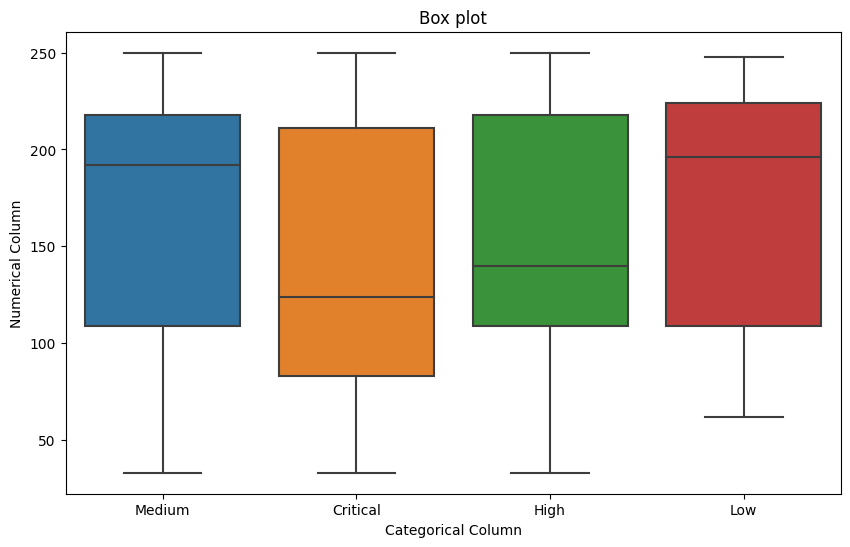

In [ ]:
#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_priority', y='sales', data=df)
plt.title('Box plot')
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.show()

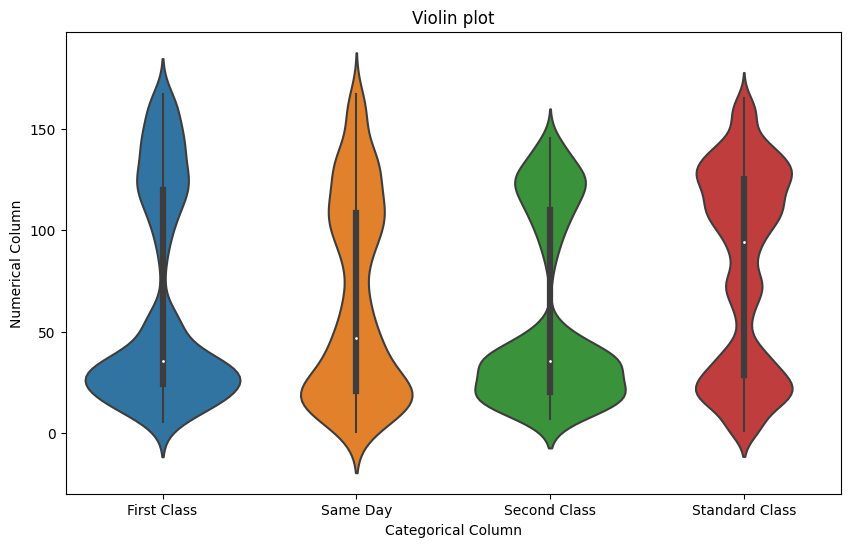

In [ ]:
#Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='ship_mode', y='profit', data=df)
plt.title('Violin plot')
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.show()

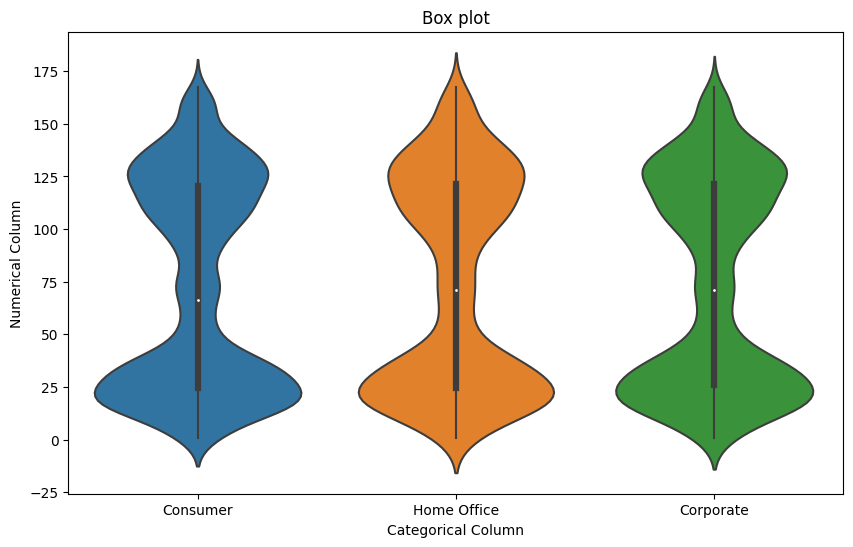

In [ ]:
#Create a box plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='segment', y='profit', data=df)
plt.title('Box plot')
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.show()

#Bisa dibilang bahwa setiap segment memberikan profit yang sama

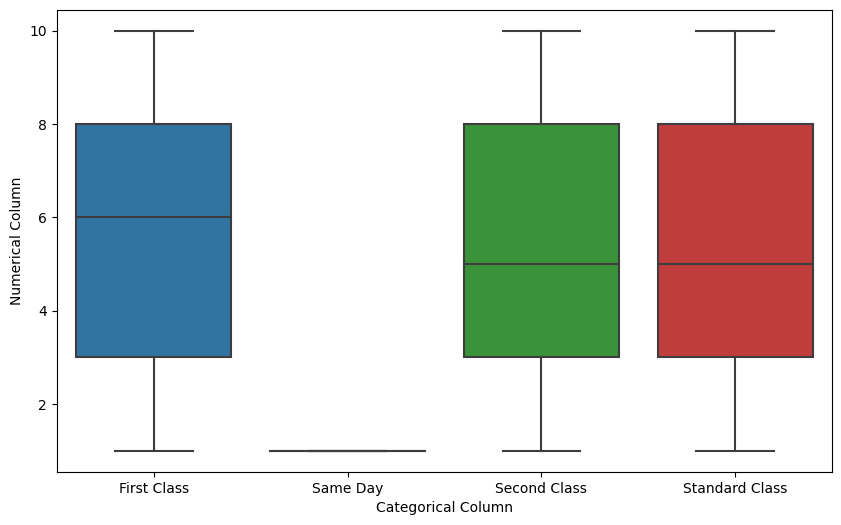

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_mode', y='aging', data=df)
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.show()


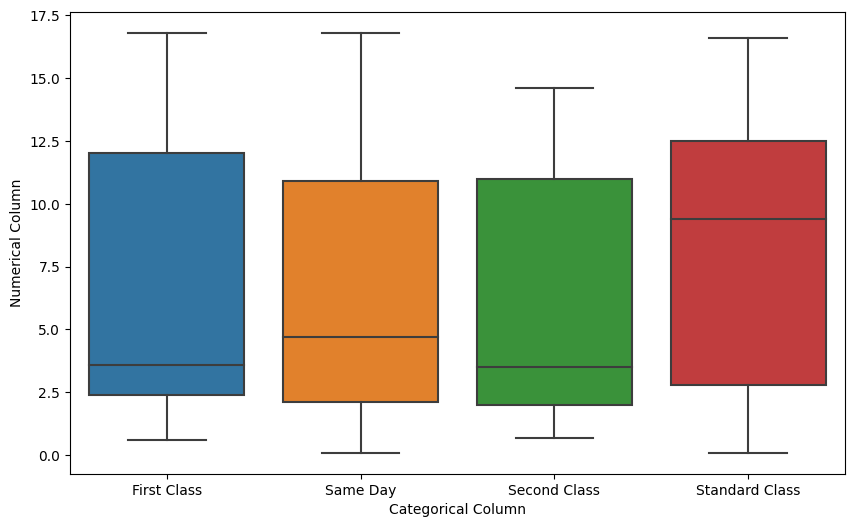

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_mode', y='shipping_cost', data=df)
plt.xlabel('Categorical Column')
plt.ylabel('Numerical Column')
plt.show()

Categorical vs Categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          49463 non-null  object        
 1   order_date        49463 non-null  datetime64[ns]
 2   ship_date         49463 non-null  datetime64[ns]
 3   aging             49463 non-null  int64         
 4   ship_mode         49463 non-null  object        
 5   product_category  49463 non-null  object        
 6   product           49463 non-null  object        
 7   sales             49463 non-null  int64         
 8   quantity          49463 non-null  int64         
 9   discount          49463 non-null  float64       
 10  profit            49463 non-null  float64       
 11  shipping_cost     49463 non-null  float64       
 12  order_priority    49463 non-null  object        
 13  customer_id       49463 non-null  object        
 14  customer_name     4946

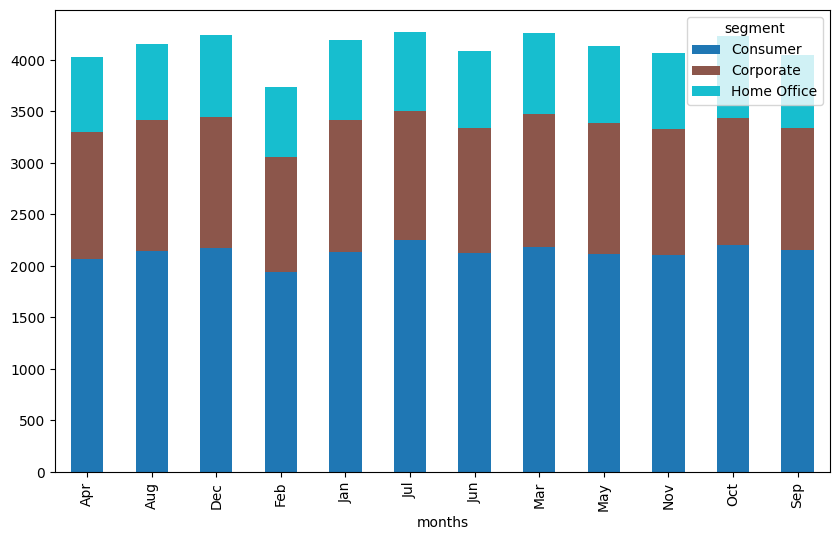

In [ ]:
#Define variables
cross_tab = pd.crosstab(index=df['months'],
                        columns=df['segment'])

#Make stacked bar graph
cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.show()

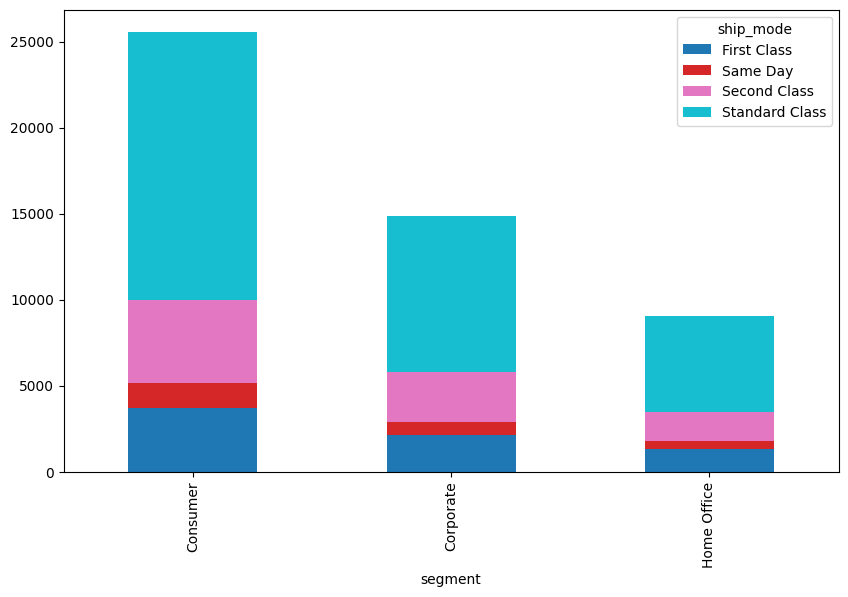

In [ ]:
#Define variables
cross_tab = pd.crosstab(index=df['segment'],
                        columns=df['ship_mode'])

#Make stacked bar graph
cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.show()

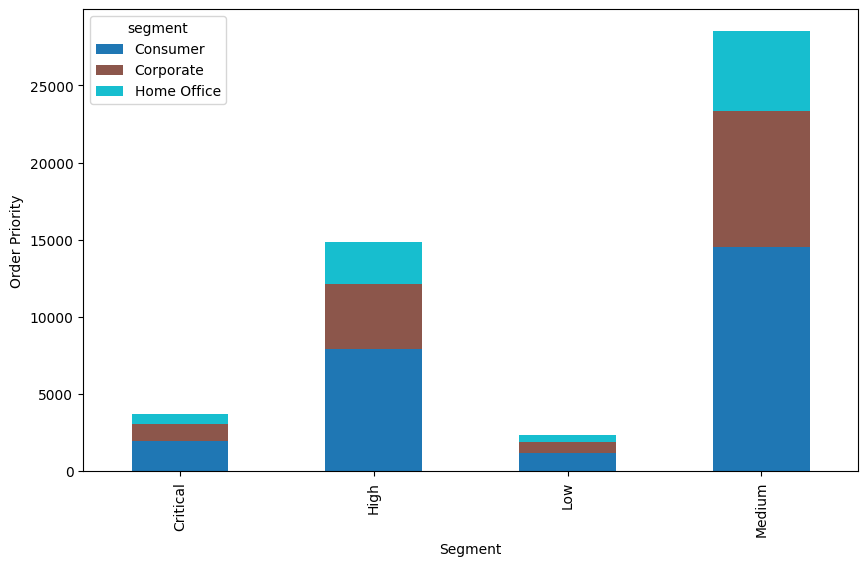

In [ ]:
#Define variables
cross_tab = pd.crosstab(index=df['order_priority'],
                        columns=df['segment'])

#Make stacked bar graph
cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.xlabel('Segment')
plt.ylabel('Order Priority')
plt.show()

In [ ]:
df.head()

order_id order_date  ship_date  aging    ship_mode    product_category  \
0  AU-2015-1 2015-11-09 2015-11-17      8  First Class  Auto & Accessories   
1  AU-2015-2 2015-06-30 2015-07-02      2  First Class  Auto & Accessories   
2  AU-2015-3 2015-12-05 2015-12-13      8  First Class  Auto & Accessories   
3  AU-2015-4 2015-05-09 2015-05-16      7  First Class  Auto & Accessories   
4  AU-2015-5 2015-07-09 2015-07-18      9  First Class  Auto & Accessories   

             product  sales  quantity  discount  ...  shipping_cost  \
0  Car Media Players    140         2      0.05  ...            4.6   
1       Car Speakers    211         3      0.03  ...           11.2   
2    Car Body Covers    117         5      0.01  ...            3.1   
3    Car & Bike Care    118         2      0.05  ...            2.6   
4               Tyre    250         1      0.04  ...           16.0   

   order_priority customer_id    customer_name      segment        city  \
0          Medium      LS-001     Lane Daniels     Consumer    Brisbane   
1          Medium      IZ-002    Alvarado Kriz  Home Office      Berlin   
2        Critical      EN-003       Moon Weien     Consumer     Porirua   
3            High      AN-004  Sanchez Bergman    Corporate       Kabul   
4        Critical      ON-005     Rowe Jackson    Corporate  Townsville   

        state      country        region months  
0  Queensland    Australia       Oceania    Nov  
1      Berlin      Germany       Central    Jun  
2  Wellington  New Zealand       Oceania    Dec  
3       Kabul  Afghanistan  Central Asia    May  
4  Queensland    Australia       Oceania    Jul  

[5 rows x 21 columns]

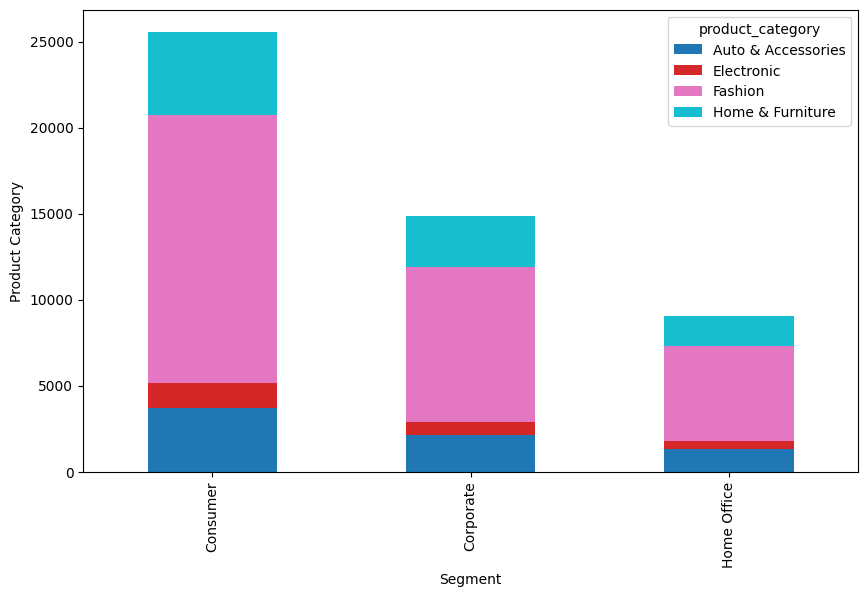

In [ ]:
#Define variables
cross_tab = pd.crosstab(index=df['segment'],
                        columns=df['product_category'])

#Make stacked bar graph
cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.xlabel('Segment')
plt.ylabel('Product Category')
plt.show()

###**Multivariate Analysis**

In [ ]:
import plotly.express as px

#Correlation
correlation_matrix = df.select_dtypes(include=['number']).corr()

#Create a heatmap of the correlation matrix
fig = px.imshow(correlation_matrix,
                x = correlation_matrix.columns,
                y = correlation_matrix.columns,
                color_continuous_scale='Cividis',
                title='Correlation Heatmap')

fig.update_layout(width=800, height=600)

#Show the heatmap
fig.show()

#profit dan shipping cost memiliki angka yang tidak jauh berbeda, profit = 160 -> shipping_cost = 16

In [ ]:
def multivariate(x, y, z):
  fig = px.scatter(df, x=x, y=y, color=z)
  fig.show()

multivariate('sales', 'profit', 'segment')

In [ ]:
multivariate('profit', 'shipping_cost', 'segment')

In [ ]:
multivariate('discount', 'profit', 'shipping_cost')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          49463 non-null  object        
 1   order_date        49463 non-null  datetime64[ns]
 2   ship_date         49463 non-null  datetime64[ns]
 3   aging             49463 non-null  int64         
 4   ship_mode         49463 non-null  object        
 5   product_category  49463 non-null  object        
 6   product           49463 non-null  object        
 7   sales             49463 non-null  int64         
 8   quantity          49463 non-null  int64         
 9   discount          49463 non-null  float64       
 10  profit            49463 non-null  float64       
 11  shipping_cost     49463 non-null  float64       
 12  order_priority    49463 non-null  object        
 13  customer_id       49463 non-null  object        
 14  customer_name     4946

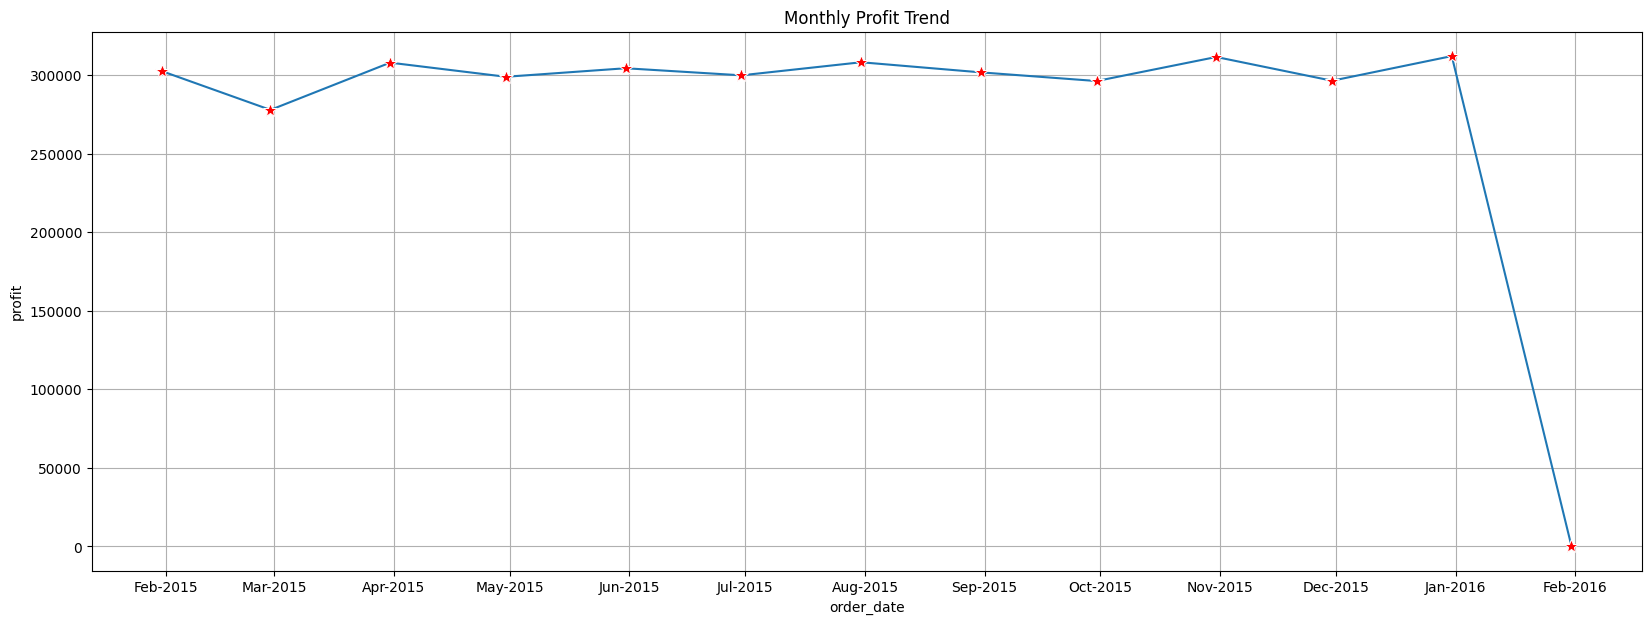

In [ ]:
# Plot Monthly trend
monthly_profit = df.copy()
monthly_profit = monthly_profit.groupby(
    by=pd.Grouper(key="order_date", freq="1M"))["profit"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Profit Trend')
ax = sns.lineplot(
    x=monthly_profit.index,
    y=monthly_profit,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [ ]:
df[(df['order_date'] == '2016-02-01')]

Empty DataFrame
Columns: [order_id, order_date, ship_date, aging, ship_mode, product_category, product, sales, quantity, discount, profit, shipping_cost, order_priority, customer_id, customer_name, segment, city, state, country, region, months]
Index: []

[0 rows x 21 columns]

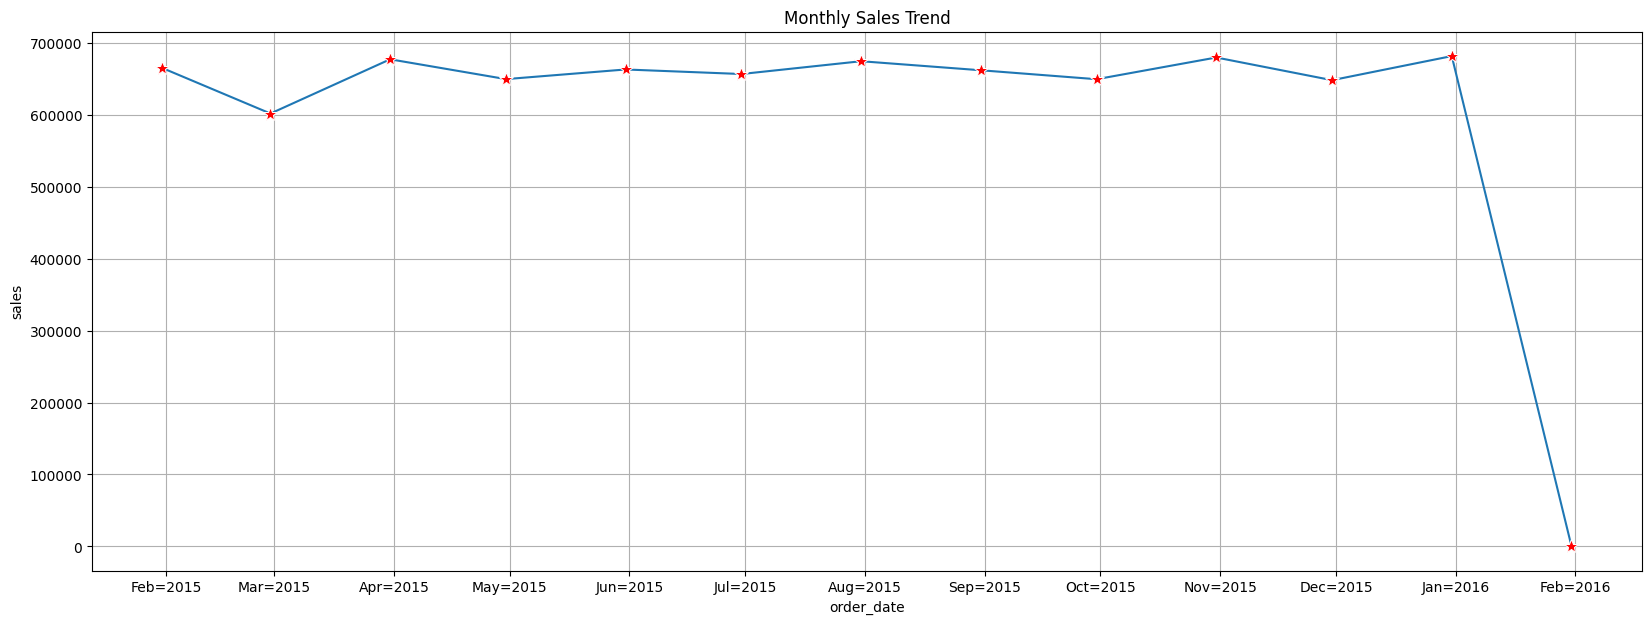

In [ ]:
line_plot_sales = df.copy()
line_plot_sales= line_plot_sales.groupby(
    pd.Grouper(key='order_date', freq='1M')
)['sales'].sum()
plt.figure(figsize=(20, 7))
plt.title('Monthly Sales Trend')
ax = sns.lineplot(
    x=line_plot_sales.index,
    y=line_plot_sales,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b=%Y'))
plt.grid()
plt.show()

#RFM

**Recency**

In [ ]:
df.head()

order_id order_date  ship_date  aging    ship_mode    product_category  \
0  AU-2015-1 2015-11-09 2015-11-17      8  First Class  Auto & Accessories   
1  AU-2015-2 2015-06-30 2015-07-02      2  First Class  Auto & Accessories   
2  AU-2015-3 2015-12-05 2015-12-13      8  First Class  Auto & Accessories   
3  AU-2015-4 2015-05-09 2015-05-16      7  First Class  Auto & Accessories   
4  AU-2015-5 2015-07-09 2015-07-18      9  First Class  Auto & Accessories   

             product  sales  quantity  discount  ...  shipping_cost  \
0  Car Media Players    140         2      0.05  ...            4.6   
1       Car Speakers    211         3      0.03  ...           11.2   
2    Car Body Covers    117         5      0.01  ...            3.1   
3    Car & Bike Care    118         2      0.05  ...            2.6   
4               Tyre    250         1      0.04  ...           16.0   

   order_priority customer_id    customer_name      segment        city  \
0          Medium      LS-001     Lane Daniels     Consumer    Brisbane   
1          Medium      IZ-002    Alvarado Kriz  Home Office      Berlin   
2        Critical      EN-003       Moon Weien     Consumer     Porirua   
3            High      AN-004  Sanchez Bergman    Corporate       Kabul   
4        Critical      ON-005     Rowe Jackson    Corporate  Townsville   

        state      country        region months  
0  Queensland    Australia       Oceania    Nov  
1      Berlin      Germany       Central    Jun  
2  Wellington  New Zealand       Oceania    Dec  
3       Kabul  Afghanistan  Central Asia    May  
4  Queensland    Australia       Oceania    Jul  

[5 rows x 21 columns]

In [ ]:
recency = df.groupby('customer_id')['order_date'].max()
recency

customer_id
AB-0010767   2015-12-10
AB-0010840   2015-11-22
AB-0011247   2015-11-10
AB-0011531   2015-08-23
AB-0011875   2015-10-16
                ...    
ZO-006146    2015-12-25
ZO-006598    2015-07-13
ZO-007407    2015-08-10
ZO-008768    2015-01-21
ZO-00914     2015-04-07
Name: order_date, Length: 49459, dtype: datetime64[ns]

In [ ]:
max(recency)

Timestamp('2016-01-02 00:00:00')

In [ ]:
recency = max(recency) - recency
recency.head(20)

customer_id
AB-0010767    23 days
AB-0010840    41 days
AB-0011247    53 days
AB-0011531   132 days
AB-0011875    78 days
AB-0012034   240 days
AB-0012223   191 days
AB-0012271    58 days
AB-0012459    13 days
AB-001253    107 days
AB-0012721    96 days
AB-0013536    79 days
AB-0013966   338 days
AB-0014116   345 days
AB-0014128   154 days
AB-0014196   324 days
AB-0014206   268 days
AB-0014492   101 days
AB-0014980   345 days
AB-0015133   284 days
Name: order_date, dtype: timedelta64[ns]

In [ ]:
recency = recency.dt.days
recency = recency.rename('Recency')
recency.head(15)

customer_id
AB-0010767     23
AB-0010840     41
AB-0011247     53
AB-0011531    132
AB-0011875     78
AB-0012034    240
AB-0012223    191
AB-0012271     58
AB-0012459     13
AB-001253     107
AB-0012721     96
AB-0013536     79
AB-0013966    338
AB-0014116    345
AB-0014128    154
Name: Recency, dtype: int64

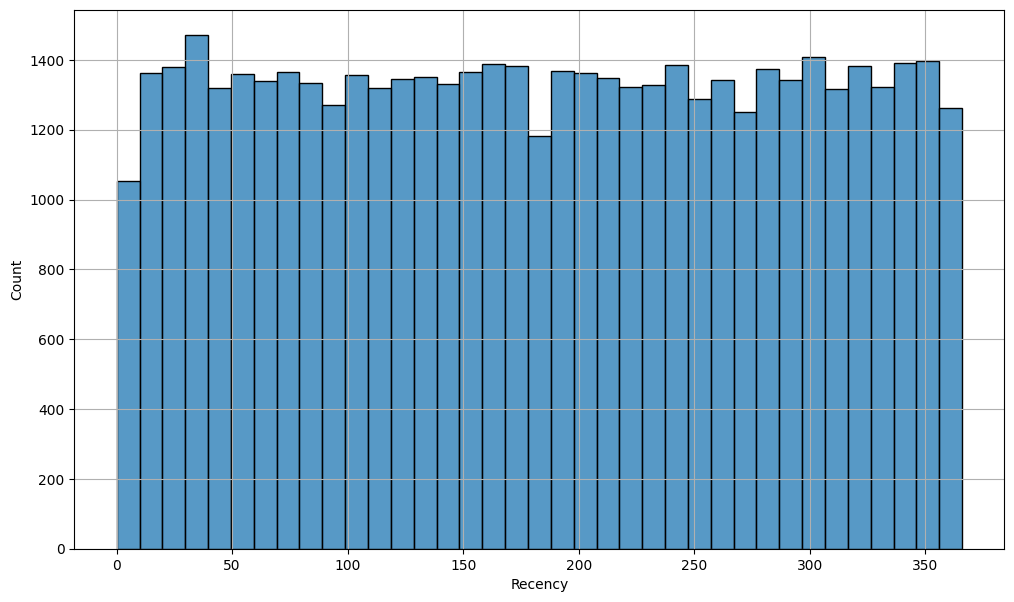

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.grid()
plt.show()

In [ ]:
recency.describe()

count    49459.000000
mean       183.623547
std        105.421969
min          0.000000
25%         92.000000
50%        183.000000
75%        275.000000
max        366.000000
Name: Recency, dtype: float64

In [ ]:
recency = recency.reset_index()
recency.head()

customer_id  Recency
0  AB-0010767       23
1  AB-0010840       41
2  AB-0011247       53
3  AB-0011531      132
4  AB-0011875       78

**Frequency**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          49463 non-null  object        
 1   order_date        49463 non-null  datetime64[ns]
 2   ship_date         49463 non-null  datetime64[ns]
 3   aging             49463 non-null  int64         
 4   ship_mode         49463 non-null  object        
 5   product_category  49463 non-null  object        
 6   product           49463 non-null  object        
 7   sales             49463 non-null  int64         
 8   quantity          49463 non-null  int64         
 9   discount          49463 non-null  float64       
 10  profit            49463 non-null  float64       
 11  shipping_cost     49463 non-null  float64       
 12  order_priority    49463 non-null  object        
 13  customer_id       49463 non-null  object        
 14  customer_name     4946

In [ ]:
frequency = df.groupby('customer_id')['order_id'].count()
frequency.head()

customer_id
AB-0010767    1
AB-0010840    1
AB-0011247    1
AB-0011531    1
AB-0011875    1
Name: order_id, dtype: int64

In [ ]:
frequency = frequency.rename('Frequency')

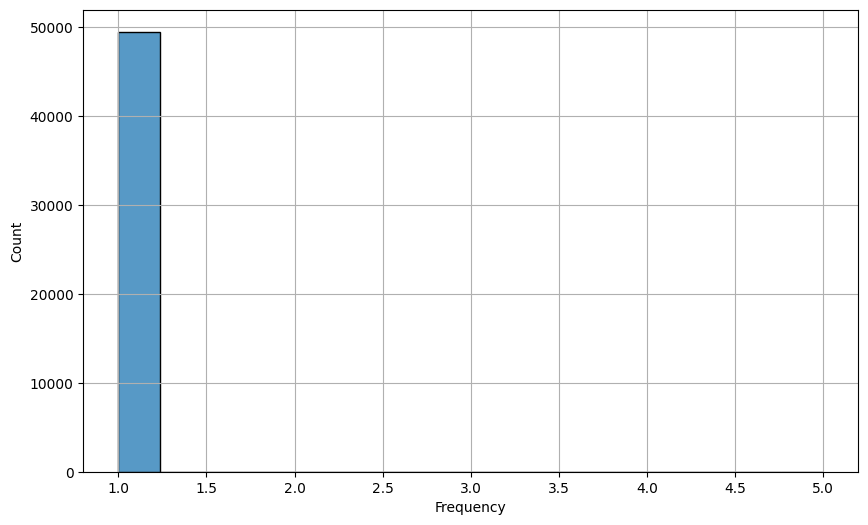

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(frequency)
plt.grid()
plt.show()

In [ ]:
frequency.describe()

count    49459.000000
mean         1.000081
std          0.017986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Frequency, dtype: float64

In [ ]:
frequency = frequency.reset_index()
frequency.head()

customer_id  Frequency
0  AB-0010767          1
1  AB-0010840          1
2  AB-0011247          1
3  AB-0011531          1
4  AB-0011875          1

**Monetary**

In [ ]:
df.iloc[:, 0:15].head()

order_id order_date  ship_date  aging    ship_mode    product_category  \
0  AU-2015-1 2015-11-09 2015-11-17      8  First Class  Auto & Accessories   
1  AU-2015-2 2015-06-30 2015-07-02      2  First Class  Auto & Accessories   
2  AU-2015-3 2015-12-05 2015-12-13      8  First Class  Auto & Accessories   
3  AU-2015-4 2015-05-09 2015-05-16      7  First Class  Auto & Accessories   
4  AU-2015-5 2015-07-09 2015-07-18      9  First Class  Auto & Accessories   

             product  sales  quantity  discount  profit  shipping_cost  \
0  Car Media Players    140         2      0.05    46.0            4.6   
1       Car Speakers    211         3      0.03   112.0           11.2   
2    Car Body Covers    117         5      0.01    31.2            3.1   
3    Car & Bike Care    118         2      0.05    26.2            2.6   
4               Tyre    250         1      0.04   160.0           16.0   

  order_priority customer_id    customer_name  
0         Medium      LS-001     Lane Daniels  
1         Medium      IZ-002    Alvarado Kriz  
2       Critical      EN-003       Moon Weien  
3           High      AN-004  Sanchez Bergman  
4       Critical      ON-005     Rowe Jackson

In [ ]:
monetary = df.groupby('customer_id')['sales'].sum()
monetary = monetary.rename('Monetary')
monetary.head(10)

customer_id
AB-0010767    159
AB-0010840    224
AB-0011247    224
AB-0011531     85
AB-0011875    213
AB-0012034    196
AB-0012223    109
AB-0012271    213
AB-0012459     62
AB-001253     211
Name: Monetary, dtype: int64

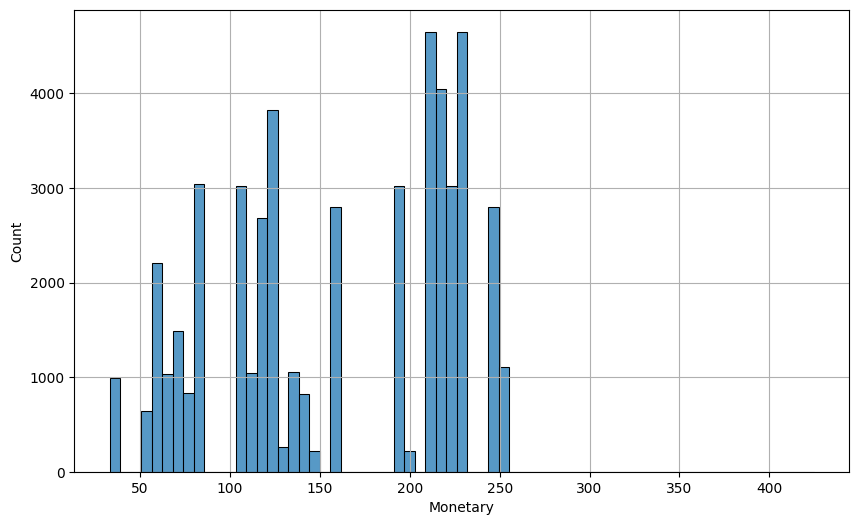

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(monetary)
plt.grid()
plt.show()

**Merge RFM Result**

In [ ]:
new = recency.merge(frequency, on='customer_id')
new

customer_id  Recency  Frequency
0      AB-0010767       23          1
1      AB-0010840       41          1
2      AB-0011247       53          1
3      AB-0011531      132          1
4      AB-0011875       78          1
...           ...      ...        ...
49454   ZO-006146        8          1
49455   ZO-006598      173          1
49456   ZO-007407      145          1
49457   ZO-008768      346          1
49458    ZO-00914      270          1

[49459 rows x 3 columns]

In [ ]:
df_new = new.merge(monetary, on='customer_id')
df_new.head()

customer_id  Recency  Frequency  Monetary
0  AB-0010767       23          1       159
1  AB-0010840       41          1       224
2  AB-0011247       53          1       224
3  AB-0011531      132          1        85
4  AB-0011875       78          1       213

In [ ]:
df_new[(df_new['Frequency'] > 1)]

customer_id  Recency  Frequency  Monetary
44019  RZ-0040981        0          5       425

In [ ]:
df_new.describe()

Recency     Frequency      Monetary
count  49459.000000  49459.000000  49459.000000
mean     183.623547      1.000081    159.931802
std      105.421969      0.017986     64.319561
min        0.000000      1.000000     33.000000
25%       92.000000      1.000000    109.000000
50%      183.000000      1.000000    159.000000
75%      275.000000      1.000000    218.000000
max      366.000000      5.000000    425.000000